In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from model import ConvStackModel
from dataset import MNISTDataset

# sci_mode=True is the default which will print values such as 9.8e-01 instead of 0.98.
torch.set_printoptions(precision=3, sci_mode=False)
# manually specify how floats should be printed. Notably, this override uses more spacing
# which I feel makes array easier to read.
np.set_printoptions(formatter={'float': lambda val: f" {val:.3f} "}, linewidth=100)

%load_ext autoreload
%autoreload 2

In [2]:
model_weights_filename = "model_weights.pt"
model_weights = torch.load("model_weights.pt", weights_only=True)

model = ConvStackModel()
model.load_state_dict(model_weights)

mnist_dataset_test = MNISTDataset(split="test")
# Load the whole dataset into memory at once!
mnist_test_dataloader = torch.utils.data.DataLoader(mnist_dataset_test, batch_size=len(mnist_dataset_test), shuffle=False) 

#### Test-set accuracy

In [3]:
mnist_test_dataloader_iter = iter(mnist_test_dataloader)
test_set_images, test_set_labels = next(mnist_test_dataloader_iter)

test_set_predictions = model(test_set_images)
max_predicted_probabilities, predicted_indices = test_set_predictions.max(dim=1)

# How many times was the class predicted with highest probability the actual-class for 
# the given input-image.
num_correct_predictions = (predicted_indices == test_set_labels).sum()

print(f"Correctly predicted the digit: {100 * num_correct_predictions / len(mnist_dataset_test):.2f}% of the time.")

Correctly predicted the digit: 90.81% of the time.


#### Test-set confusion matrix

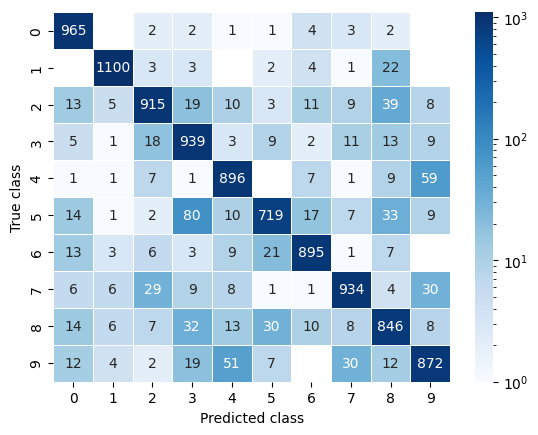

In [4]:
# True-classes are on the rows (i.e. y-axis) and Predicted-classes are on the columns (i.e. x-axis).
confusion_matrix = torch.zeros(size=(10, 10), dtype=torch.int)
# I want a 2-D array where array[i][j] = Number of times the true-class was i and the model predicted class j.
for dataset_idx in range(0, len(mnist_dataset_test)):
    
    actual_class = test_set_labels[dataset_idx].item()
    predicted_class = predicted_indices[dataset_idx].item()
    
    confusion_matrix[actual_class][predicted_class] += 1

ax = sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidth=0.5, cmap='Blues', norm=matplotlib.colors.LogNorm())
ax.set_ylabel("True class")
_ = ax.set_xlabel("Predicted class")